# <span style='color:Blue'>The Sparks Foundation</span>

## <span style='color:Violet'>Data Science and Business Analytics TASK-1</span>
## <span style='color:Red'>gripmay21</span>

## AUTHOR :-
# <span style='color:Orange'>Kamal Pentakota</span>

## <span style='color:Brown'>Importing all the required Libraries</span>


In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style='color:Red'>Reading Data</span>


In [287]:
# reading data from 'student_scores_data.csv' file
data=pd.read_csv('student_scores_data.csv')

In [312]:
data.shape
# No. of rows and columns in the table

(25, 2)

In [288]:
print('Columns in the table are Hours and Scores :-')
data.columns

Columns in the table are Hours and Scores :-


Index(['Hours', 'Scores'], dtype='object')

In [289]:
print('Printing data of all 25 rows')
data.head(25)

Printing data of all 25 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [290]:
# Identifying categorical and continuous variables
data.dtypes
# As expected we got both variables as continuous

Hours     float64
Scores      int64
dtype: object

## <span style='color:Orange'>2 1D arrays of both columns in the data</span>


In [291]:
# Making 2 separate 1D arrays for both columns
time=pd.DataFrame(data,columns=['Hours'])
marks=pd.DataFrame(data,columns=['Scores'])

## <span style='color:Blue'>Outliers and Missing Values Detection</span>

In [292]:
data.isnull().sum()
# We can see we don't have any missing values

Hours     0
Scores    0
dtype: int64

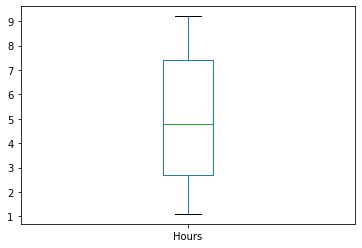

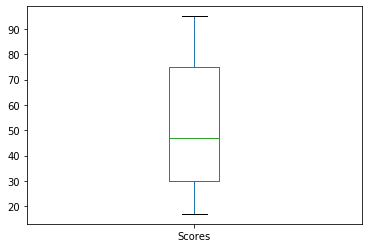

In [293]:
# Detecting Outliers
time.plot.box()
marks.plot.box()
# We can see there are no outliers

##  <span style='color:Green'>UNIVARIATE ANALYSIS</span>

In [294]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Histogram Plots of Hours and Scores Respectively 



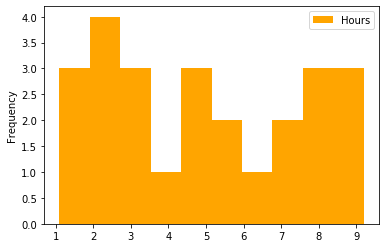

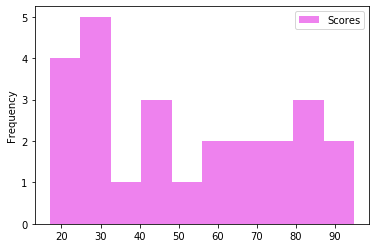

In [295]:
a=time.plot.hist(color='orange')#plt.hist(data['Hours'])
b=marks.plot.hist(color='violet')
print('Histogram Plots of Hours and Scores Respectively','\n')

In [296]:
#Frequency of each value in Hours
data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [297]:
#Frequency of each value in Scores
data['Scores'].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

## <span style='color:Maroon'>BIVARIATE ANALYSIS</span>

In [298]:
# i.e. the relation between the variables HOURS AND SCORES

Text(0.5, 1.0, 'Scatter Plot of Hours vs Scores')

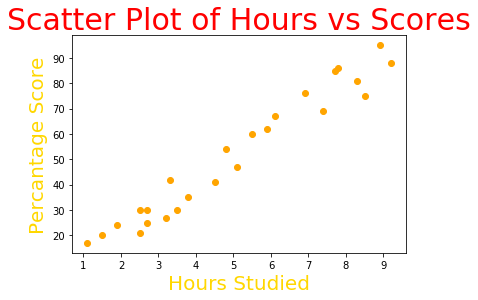

In [299]:
plt.scatter(time,marks,marker='o',color='orange')
plt.xlabel('Hours Studied',color='Gold',size=20)
plt.ylabel('Percantage Score',color='Gold',size=20)
plt.title('Scatter Plot of Hours vs Scores',color='red',size=30)

## <span style='color:Orange'>From Scatter Plot we can draw the observation that there is a linear relation between the variables Hours and Scores</span>

In [300]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## <span style='color:Red'> Segregating Variables into input and output </span>

In [302]:
x_var=data.iloc[:,:-1].values
y_var=data.iloc[:,1].values
x_var,y_var

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [303]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

## <span style='color:Orange'> Splitting Our data into training and testing parts </span>

### We will use train_test_split() method from scikit-learn library to split our data

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_var,y_var,test_size=0.2,random_state=56)

## <span style='color:Brown'> Training our Model </span>

## <span style='color:Violet'>Importing Our Algoithmn to train this data and i.e. Linear Regression</span>

In [305]:
from sklearn.linear_model import LinearRegression as LR
lr=LR()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Acoording to linear regression the relation which we are predicting between Hours and Scores variable is given by below plot

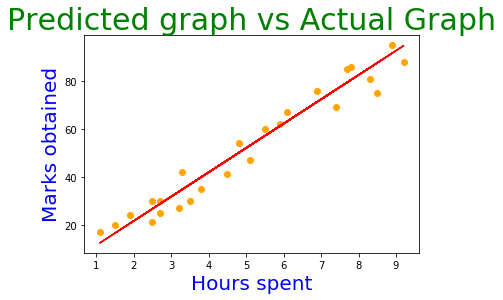

In [306]:
line =lr.coef_*x_var+lr.intercept_
plt.scatter(data['Hours'],data['Scores'],color='orange')
plt.plot(x_var,line,color='red')
plt.title('Predicted graph vs Actual Graph',size=30,color='Green')
plt.xlabel('Hours spent',color='Blue',size=20)
plt.ylabel('Marks obtained',color='Blue',size=20)
plt.show()

## <span style='color:Orange'>Making Predictions</span>

In [307]:
y_pred=lr.predict(x_test)

###  <span style='color:Brown'>Testing data</span>

In [308]:
#input
x_test

array([[2.5],
       [7.4],
       [3.8],
       [8.5],
       [6.1]])

In [309]:
# Comparing Actual and Predicted Data
pd.DataFrame({'Actual_Score':y_test,'Predicted_Score':y_pred})

,Actual_Score,Predicted_Score
0,30,26.647020
1,69,76.487276
2,35,39.869945
3,75,87.675905
4,67,63.264351


##  <span style='color:Red'>Question:-</span>

In [314]:
hours=[[9.25]]
pred_ans=lr.predict(hours)
# pred_ans[0]
print(f"According to linear regression model you can score {pred_ans[0]}")

According to linear regression model you can score 95.30451579533698


## <span style='color:Blue'>Evaluating the Model via Mean Absolute Error metric</span>

In [311]:
from sklearn import metrics
error=metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error = {error}")

Mean Absolute Error = 6.424351078220738
